<a href="https://www.kaggle.com/code/gustavolenin/house-prices-eda-linear-ridge-lasso-regression?scriptVersionId=105171077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Definição do Problema

### Predição de aluguéis de casas

Peça a um comprador de imóveis para descrever a casa dos seus sonhos, e eles provavelmente não começarão com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição de playground prova que muito mais influencia as negociações de preços do que o número de quartos ou uma cerca branca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

# 2. Extração dos Dados

#### Importação de Bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")

#### Extração dos Dados

In [2]:
# Extração dos Dados de treino
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Extração dos Dados de teste
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Primeiro passo que devemos fazer, antes mesmo de lidarmos com a análise exploratória e com o nosso modelo de machine learning, é verificarmos o significado de cada uma das entradas das nossas variáveis de modo que saibamos lidar melhor com os valores NaN. Os valores NaN correspondem, neste caso, a dados que se referem a itens que não estão presentes no imóvel dessa forma não tem avaliação. Então, substituiremos os valores NaN por 0 para indicarmos que o imóvel não contém aquele item.

In [4]:
df_train.fillna('0',inplace=True)
df_test.fillna('0',inplace=True)

#### Descrição de cada coluna

`SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.

`MSSubClass`: The building class

`MSZoning`: The general zoning classification

`LotFrontage`: Linear feet of street connected to property

`LotArea`: Lot size in square feet

`Street`: Type of road access

`Alley`: Type of alley access

`LotShape`: General shape of property

`LandContour`: Flatness of the property

`Utilities`: Type of utilities available

`LotConfig`: Lot configuration

`LandSlope`: Slope of property

`Neighborhood`: Physical locations within Ames city limits

`Condition1`: Proximity to main road or railroad

`Condition2`: Proximity to main road or railroad (if a second is present)

`BldgType`: Type of dwelling

`HouseStyle`: Style of dwelling

`OverallQual`: Overall material and finish quality

`OverallCond`: Overall condition rating

`YearBuilt`: Original construction date

`YearRemodAdd`: Remodel date

`RoofStyle`: Type of roof

`RoofMatl`: Roof material

`Exterior1st`: Exterior covering on house

`Exterior2nd`: Exterior covering on house (if more than one material)

`MasVnrType`: Masonry veneer type

`MasVnrArea`: Masonry veneer area in square feet

`ExterQual`: Exterior material quality

`ExterCond`: Present condition of the material on the exterior

`Foundation`: Type of foundation

`BsmtQual`: Height of the basement

`BsmtCond`: General condition of the basement

`BsmtExposure`: Walkout or garden level basement walls

`BsmtFinType1`: Quality of basement finished area

`BsmtFinSF1`: Type 1 finished square feet

`BsmtFinType2`: Quality of second finished area (if present)

`BsmtFinSF2`: Type 2 finished square feet

`BsmtUnfSF`: Unfinished square feet of basement area

`TotalBsmtSF`: Total square feet of basement area

`Heating`: Type of heating

`HeatingQC`: Heating quality and condition

`CentralAir`: Central air conditioning

`Electrical`: Electrical system

`1stFlrSF`: First Floor square feet

`2ndFlrSF`: Second floor square feet

`LowQualFinSF`: Low quality finished square feet (all floors)

`GrLivArea`: Above grade (ground) living area square feet

`BsmtFullBath`: Basement full bathrooms

`BsmtHalfBath`: Basement half bathrooms

`FullBath`: Full bathrooms above grade

`HalfBath`: Half baths above grade

`Bedroom`: Number of bedrooms above basement level

`Kitchen`: Number of kitchens

`KitchenQual`: Kitchen quality

`TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)

`Functional`: Home functionality rating

`Fireplaces`: Number of fireplaces

`FireplaceQu`: Fireplace quality

`GarageType`: Garage location

`GarageYrBlt`: Year garage was built

`GarageFinish`: Interior finish of the garage

`GarageCars`: Size of garage in car capacity

`GarageArea`: Size of garage in square feet

`GarageQual`: Garage quality

`GarageCond`: Garage condition

`PavedDrive`: Paved driveway

`WoodDeckSF`: Wood deck area in square feet

`OpenPorchSF`: Open porch area in square feet

`EnclosedPorch`: Enclosed porch area in square feet

`3SsnPorch`: Three season porch area in square feet

`ScreenPorch`: Screen porch area in square feet

`PoolArea`: Pool area in square feet

`PoolQC`: Pool quality

`Fence`: Fence quality

`MiscFeature`: Miscellaneous feature not covered in other categories

`MiscVal`: $ Value of miscellaneous feature

`MoSold`: Month Sold

`YrSold`: Year Sold

`SaleType`: Type of sale

`SaleCondition`: Condition of sale

# 3. Preparação dos Dados

In [5]:
# Nomes das colunas
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Dimensão do Dataset
print('Número de Linhas = ',df_train.shape[0])
print('Número de Colunas = ',df_train.shape[1])

Número de Linhas =  1460
Número de Colunas =  81


In [7]:
# Tipo de Cada Coluna
df_train.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

In [8]:
unique_values = []
# Verificando os valores únicos por coluna
[(unique_values.append(str(df_train[coluna].nunique())),print(coluna+' possui '+str(df_train[coluna].nunique())+' valores únicos')) for coluna in df_train.columns];

Id possui 1460 valores únicos
MSSubClass possui 15 valores únicos
MSZoning possui 5 valores únicos
LotFrontage possui 111 valores únicos
LotArea possui 1073 valores únicos
Street possui 2 valores únicos
Alley possui 3 valores únicos
LotShape possui 4 valores únicos
LandContour possui 4 valores únicos
Utilities possui 2 valores únicos
LotConfig possui 5 valores únicos
LandSlope possui 3 valores únicos
Neighborhood possui 25 valores únicos
Condition1 possui 9 valores únicos
Condition2 possui 8 valores únicos
BldgType possui 5 valores únicos
HouseStyle possui 8 valores únicos
OverallQual possui 10 valores únicos
OverallCond possui 9 valores únicos
YearBuilt possui 112 valores únicos
YearRemodAdd possui 61 valores únicos
RoofStyle possui 6 valores únicos
RoofMatl possui 8 valores únicos
Exterior1st possui 15 valores únicos
Exterior2nd possui 16 valores únicos
MasVnrType possui 5 valores únicos
MasVnrArea possui 328 valores únicos
ExterQual possui 4 valores únicos
ExterCond possui 5 valores

In [9]:
features_bar = []
# Seleção de variáveis para plotagem do gráfico de barras na análise univariada
[(features_bar.append(coluna)) for coluna in df_train.columns if df_train[coluna].nunique() <= 7];

In [10]:
# Verificando a existência de possíveis linhas duplicadas nos dados de treino
df_train.duplicated().sum()

0

In [11]:
# Verificando a existência de possíveis valores ausentes nos dados de treino
df_train.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [12]:
# Verificando a existência de possíveis valores ausentes nos dados de teste
df_test.isnull().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

# 4. Exploração / Visualização dos Dados

#### Estatística Descritiva

In [13]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_train_describe = df_train.describe().T
df_train_describe

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se está para esquerda ou para a direita. Se a assimetria (skew) estiver entre -0,5 e 0,5, os dados são bastante simétricos; Se a assimetria (skew) estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados serão moderadamente distorcidos; Se a assimetria (skew) for menor que -1 ou maior que 1, os dados são altamente distorcidos;

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [14]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df_train.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_train.select_dtypes(exclude=['int64', 'float64'])

In [15]:
df_train_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_train_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_train_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_train_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [16]:
df_train_descritive_statistics = pd.concat([df_train_describe,df_train_skewness,df_train_kurtosis,df_train_median,df_train_intervalo],\
                                     axis=1)
df_train_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0,0.000000,-1.200000,730.5,1459
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,1.407657,1.580188,50.0,170
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,12.207688,203.243271,9478.5,213945
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,0.216944,0.096293,6.0,9
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,0.693067,1.106413,5.0,8
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,-0.613461,-0.439552,1973.0,138
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,-0.503562,-1.272245,1994.0,60
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,1.685503,11.118236,383.5,5644
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,4.255261,20.113338,0.0,1474
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0,0.920268,0.474994,477.5,2336


In [17]:
numeric_data = num_attributes.copy()
cat_data     = cat_attributes.copy()

### Análise Univariada

In [18]:
# Create the function to visualize to bar chart
def draw_bar_chart(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.bar(x=df_train[name_feature].value_counts().index,height=df_train[name_feature].value_counts())
        axes.set_title(name_feature,fontsize=15)
        
        indice += 1
        
    plt.show() 
    
    return

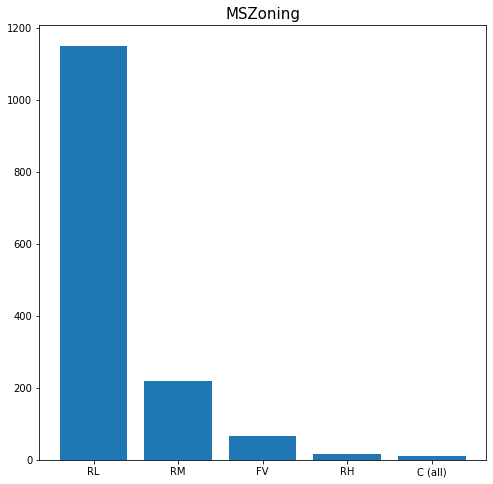

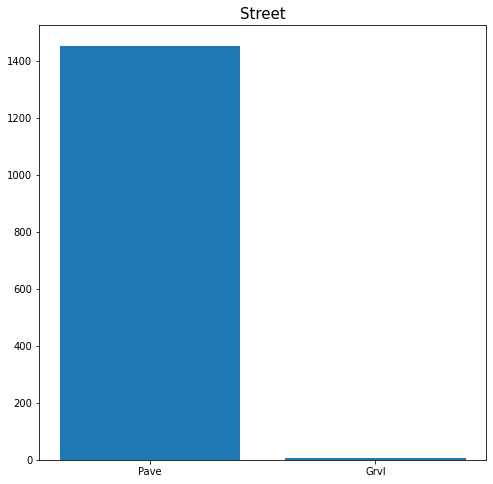

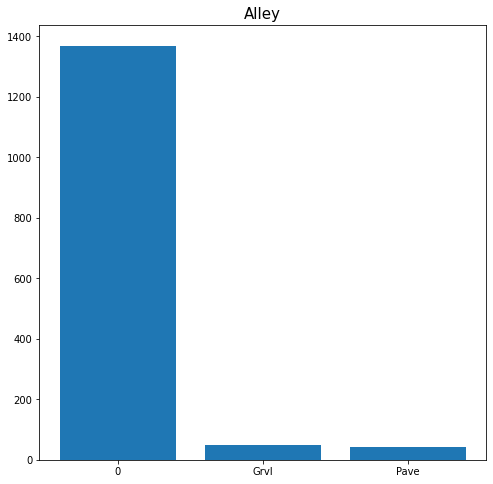

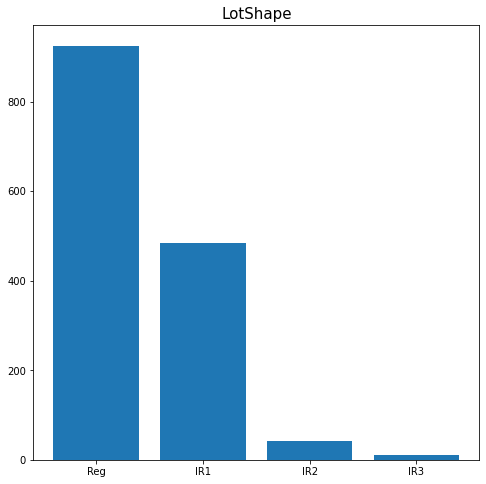

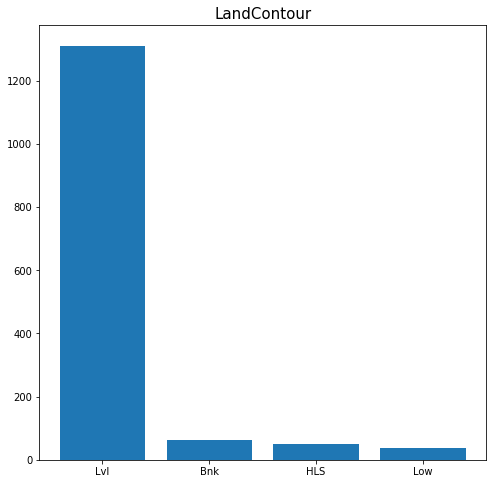

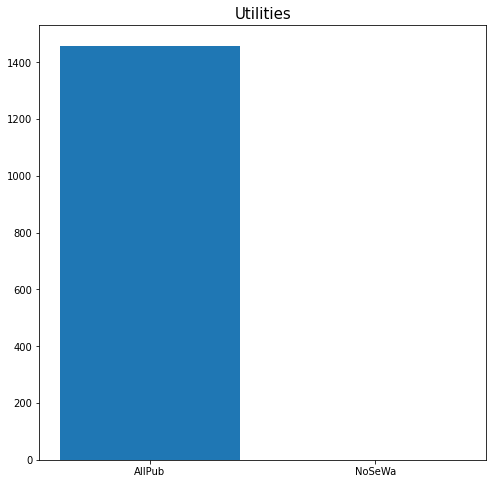

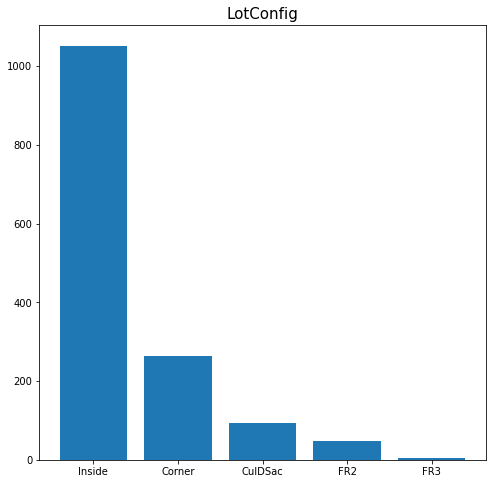

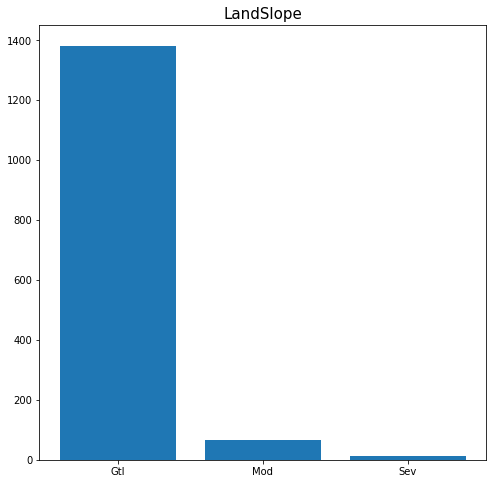

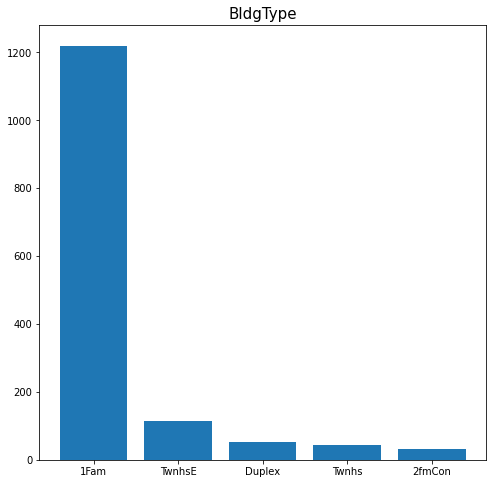

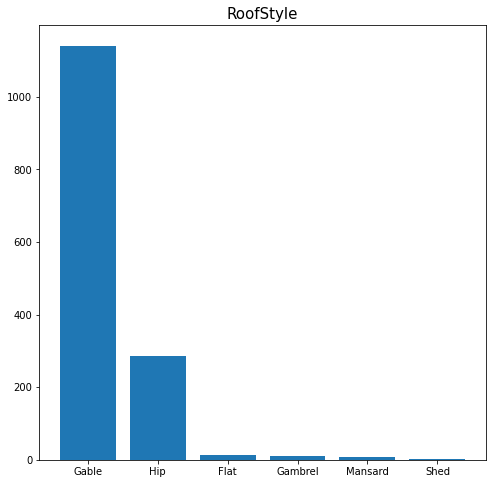

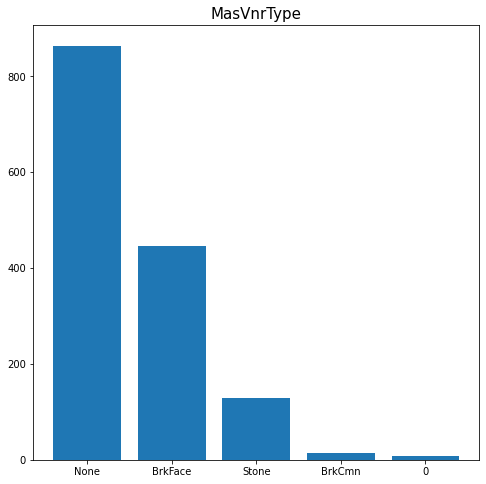

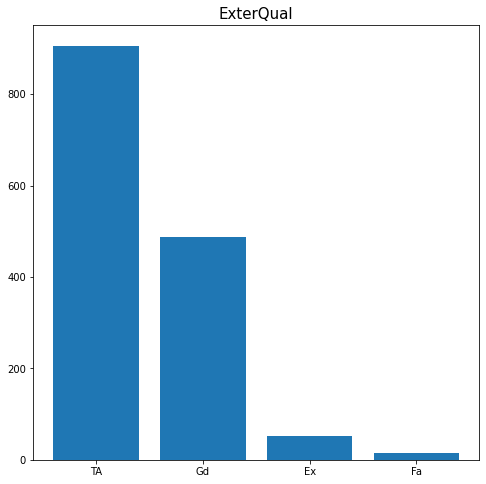

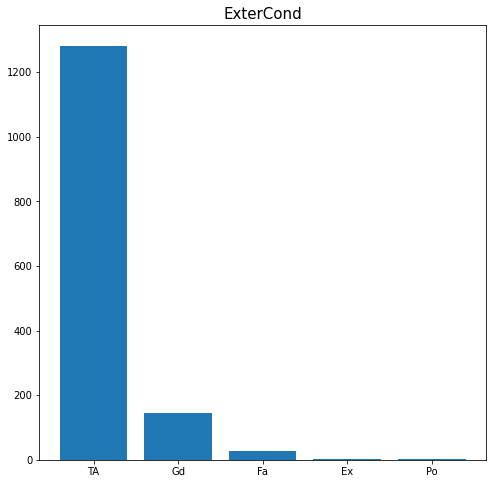

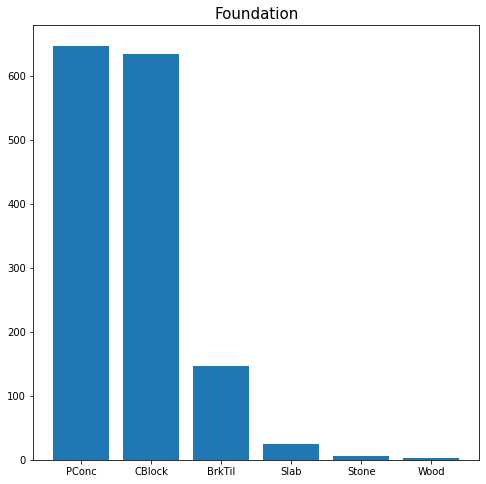

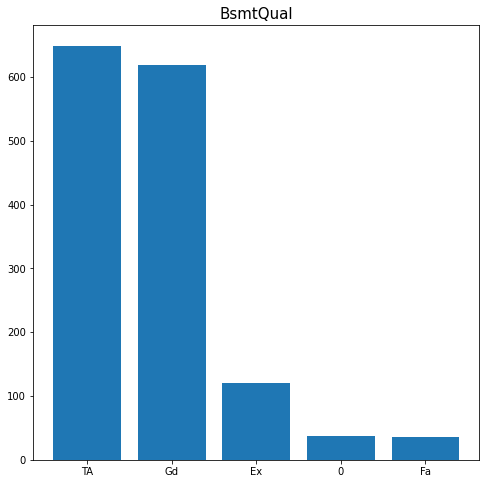

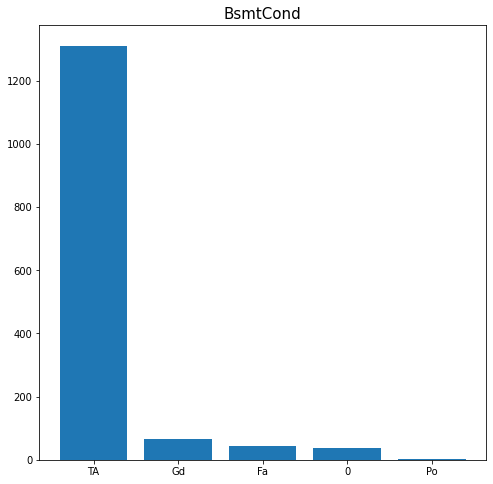

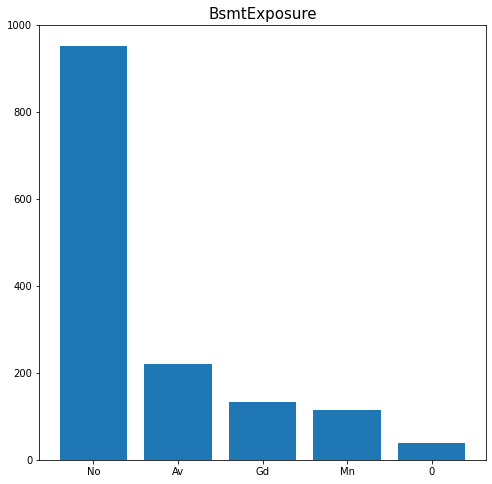

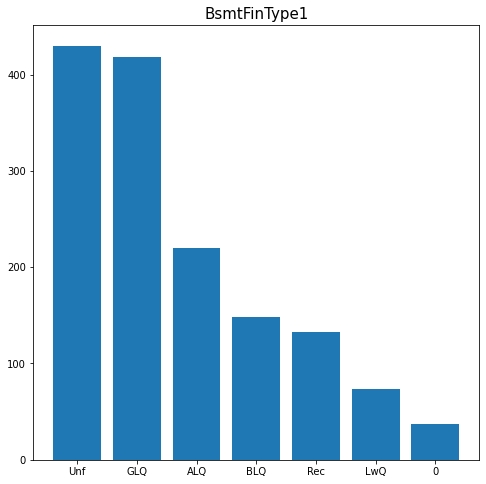

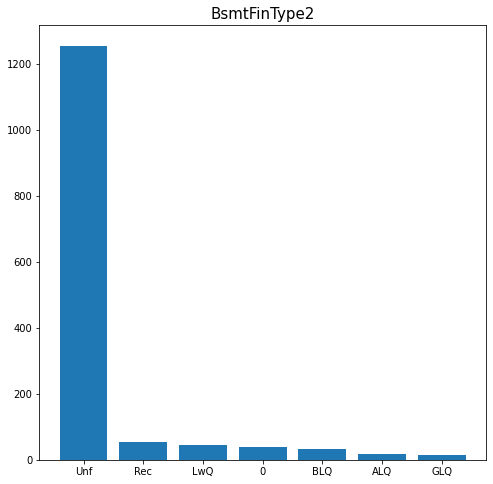

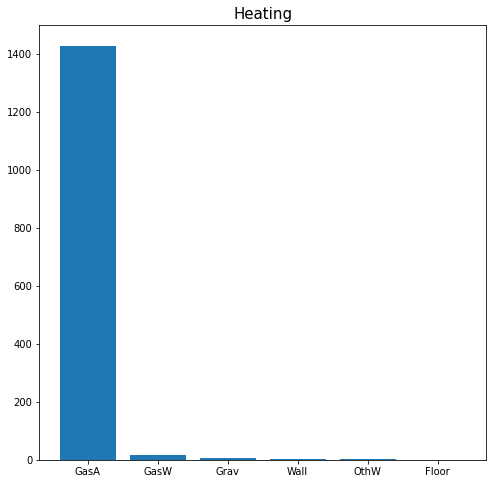

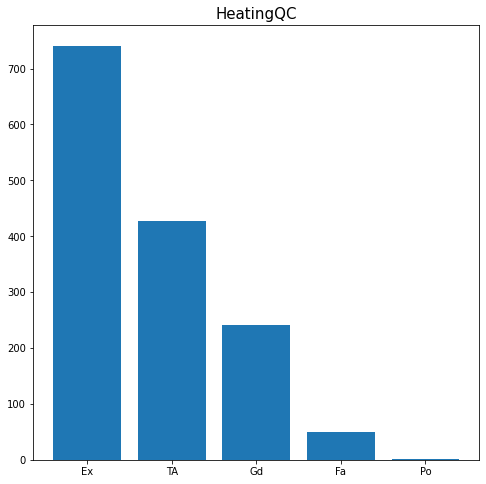

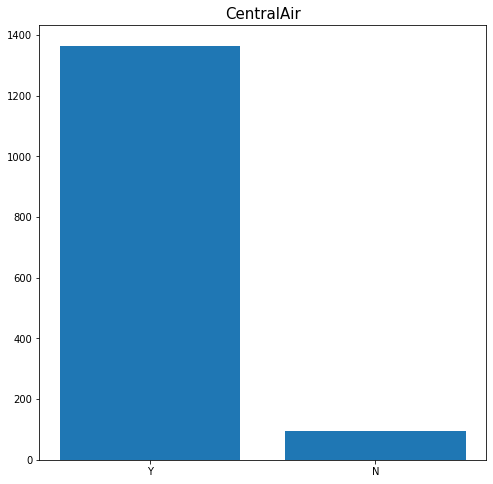

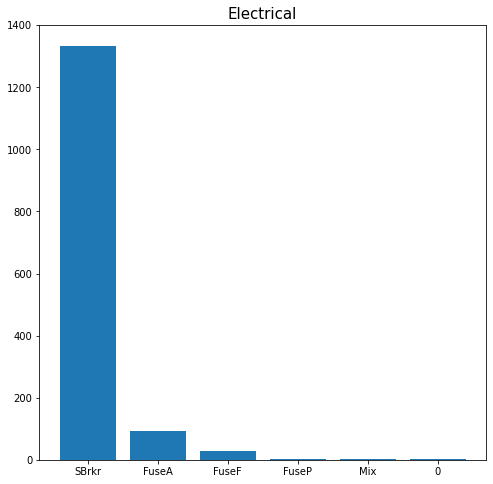

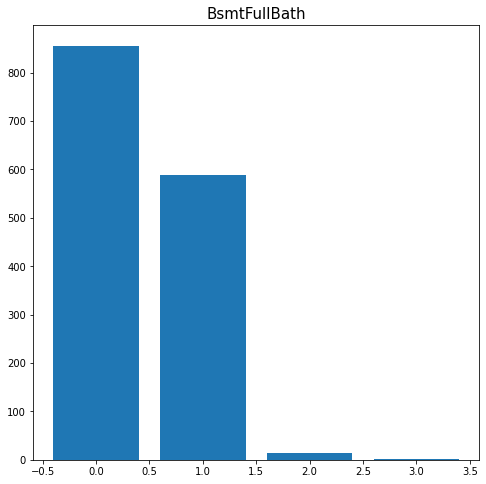

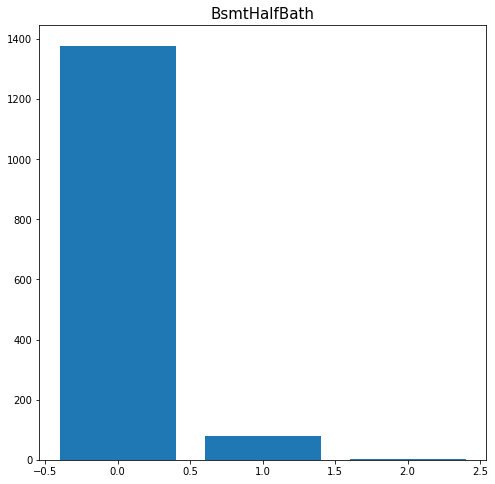

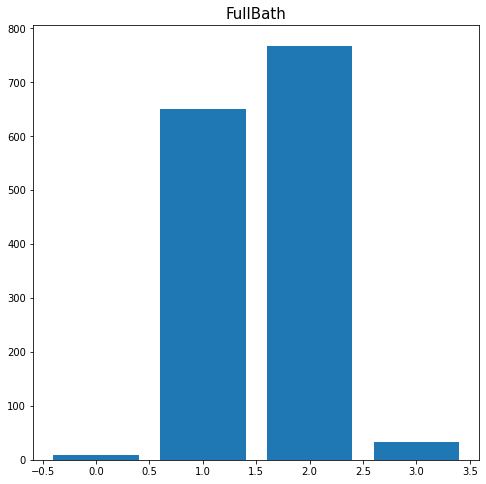

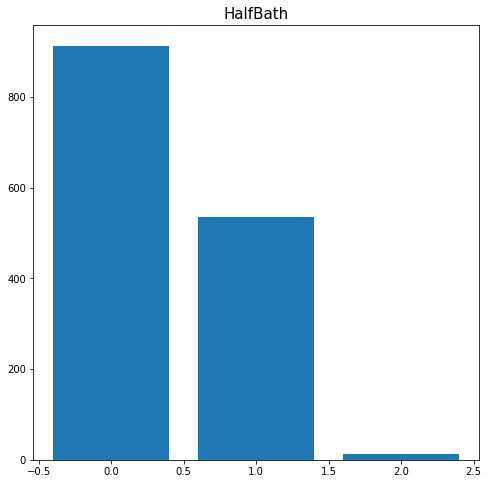

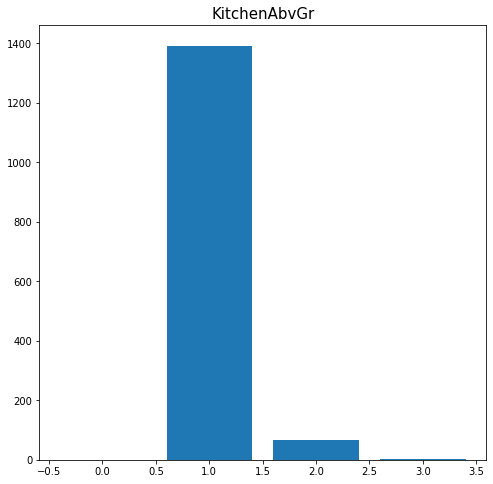

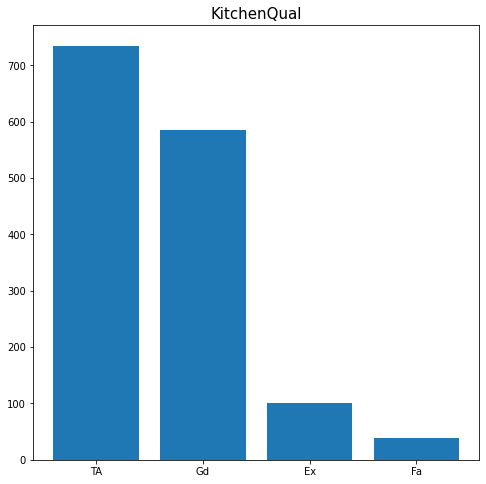

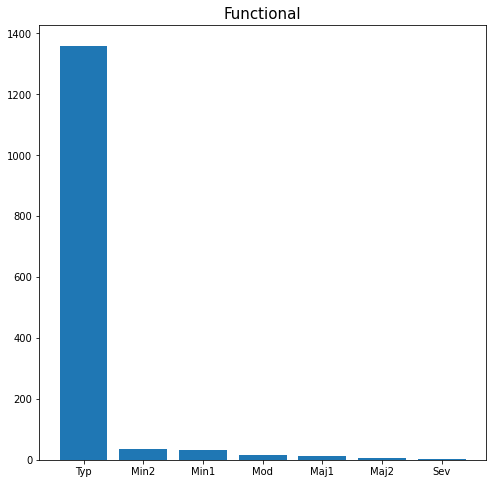

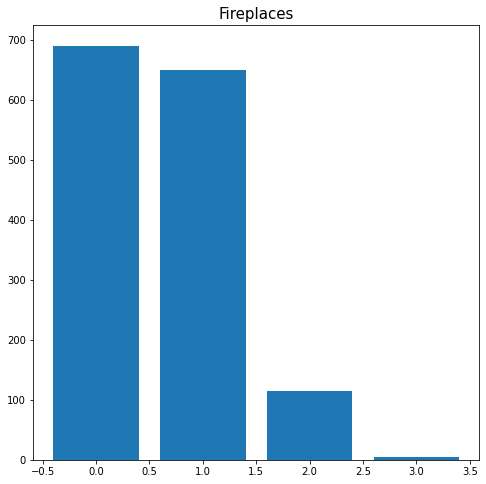

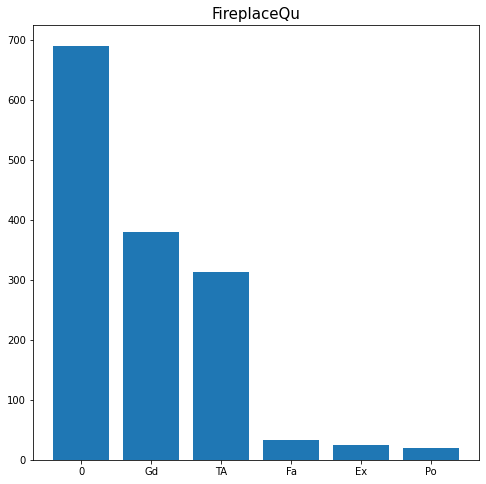

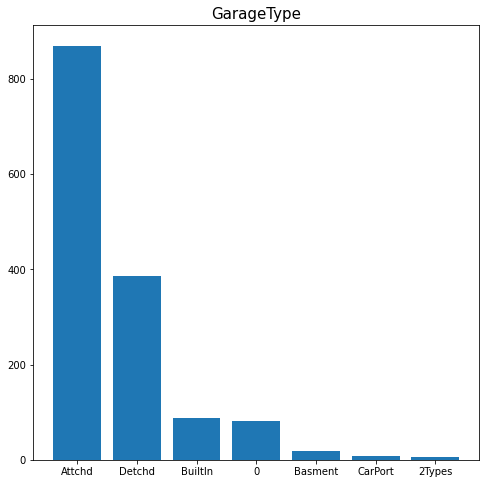

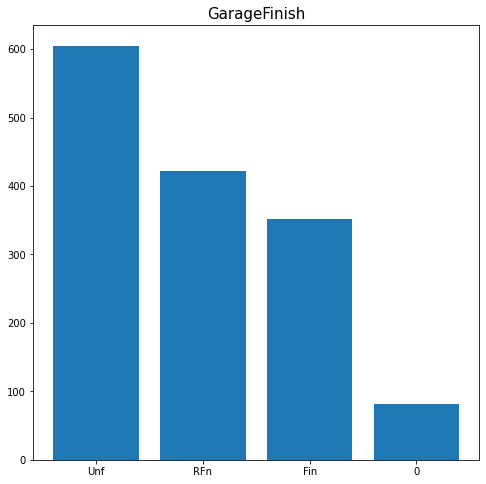

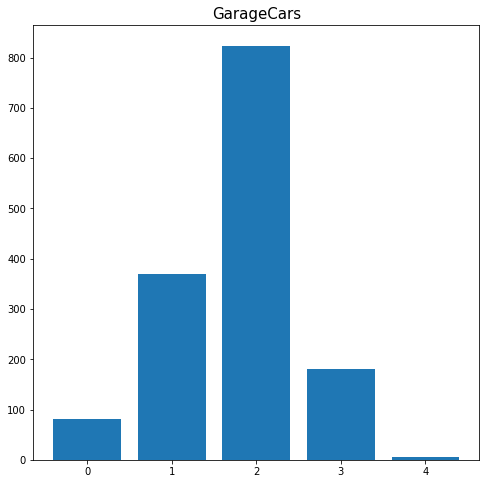

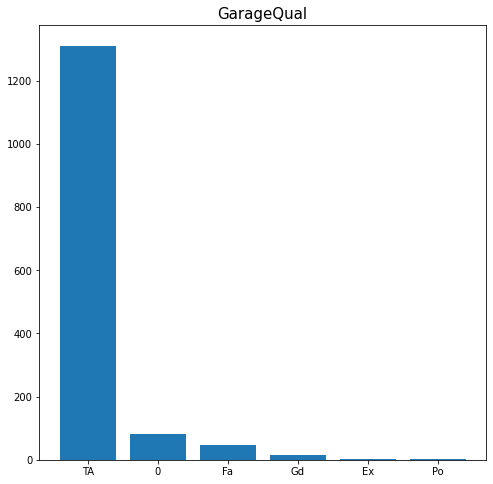

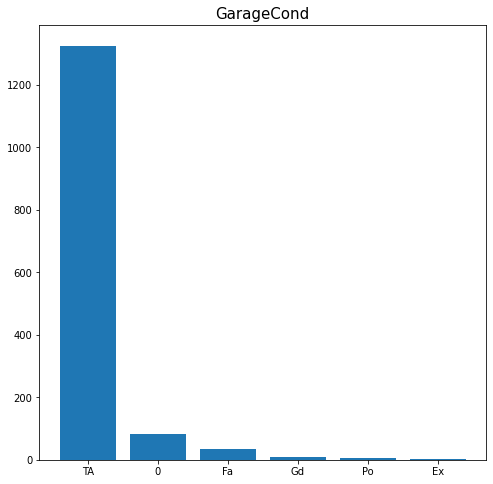

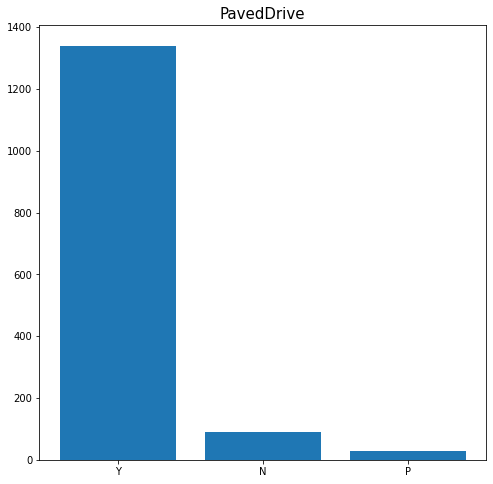

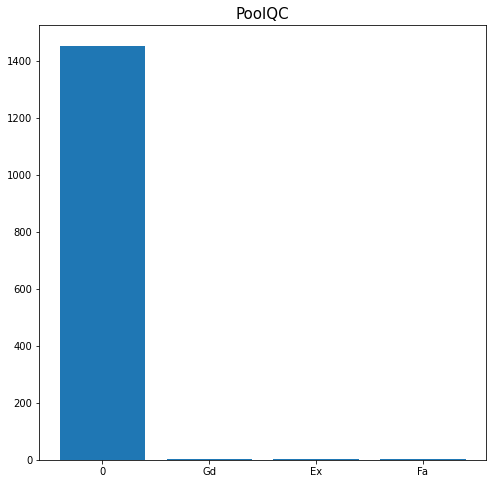

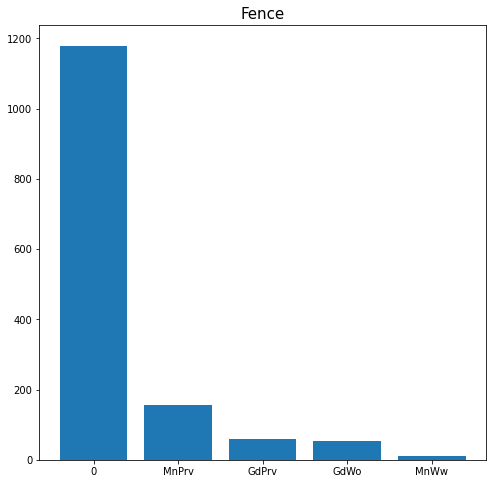

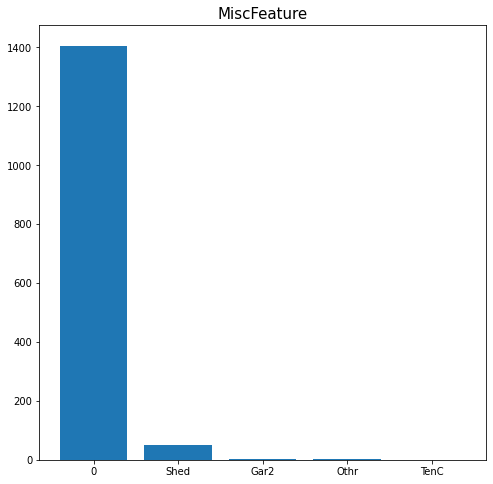

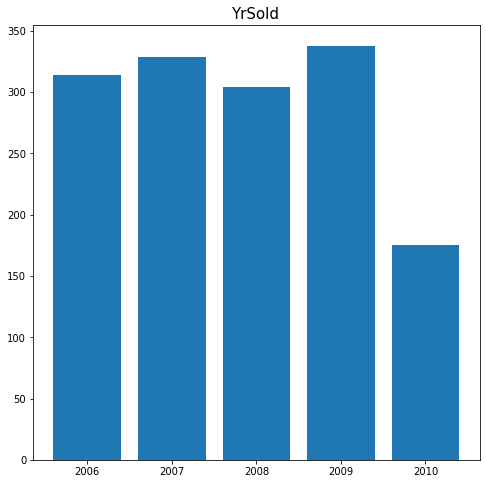

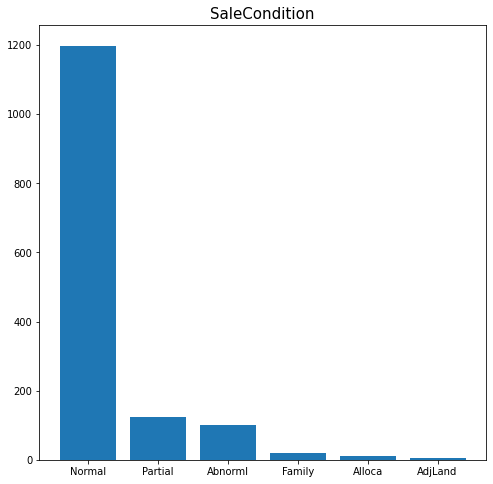

In [19]:
draw_bar_chart(features_bar)

**Insights**: 

**Notamos que a grande maioria dos imóveis:** 
* Se localizam em região de baixa densidade demográfica;
* Possuem rua pavimentada;
* Não possuem beco de acesso;
* Formato geral regular;
* Próximo do nível plano;
* Possuem todos os serviços públicos de utilidade;
* Possuem configuração interna do lote;
* Levemente inclinadas;
* Pertencem a uma família;
* Possuem telhado de duas águas;
* Não têm folheamento de alvenaria;
* Possuem material do exterior de qualidade razoável;
* Possuem condição do material externo é razoável;
* Possuem fundação de: Concreto Derramado e blocos de concreto;
* Possuem altura do porão: típica (80-89 polegadas), boa (90-99 polegadas);
* Possuem porão com condição geral típica (leve umidade permitida);
* Não possuem paredes no nível do jardim;
* Possuem área acabada do porão: não acabada ou de bom alojamento;
* Que possuem vários porões, têm área do porão não acabada;
* Possuem tipo de aquecimento de forno de ar quente forçado a gás com qualidade e condição excelente;
* Possuem central de ar-condicionado;
* Possuem disjuntores padrão e Romex;
* Possuem nenhum ou 1 Banheiro completo do porão e nenhum banheiro parcial no porão;
* Possuem 1 ou 2 Banheiros completos acima do nível e nenhum ou 1 banheiro parcial acima do nível;
* Possuem 1 cozinha acima do nível cuja qualidade é razoável ou boa;
* Possuem funcionalidade típica;
* Possuem nenhuma ou 1 lareira;
* Possuem garagens anexadas à casa dentre as quais a maioria são não terminadas, têm qualidade razoável e condição geral razoável, assim como espaço para 2 carros;
* Possuem entrada pavimentada;
* Não possuem piscina;
* Não possuem cerca;
* Não possuem recurso diverso não coberto em outras categorias;
* Foram vendas normais e foram vendidas anteriormente a 2010, neste ano houve uma grande redução nas vendas;

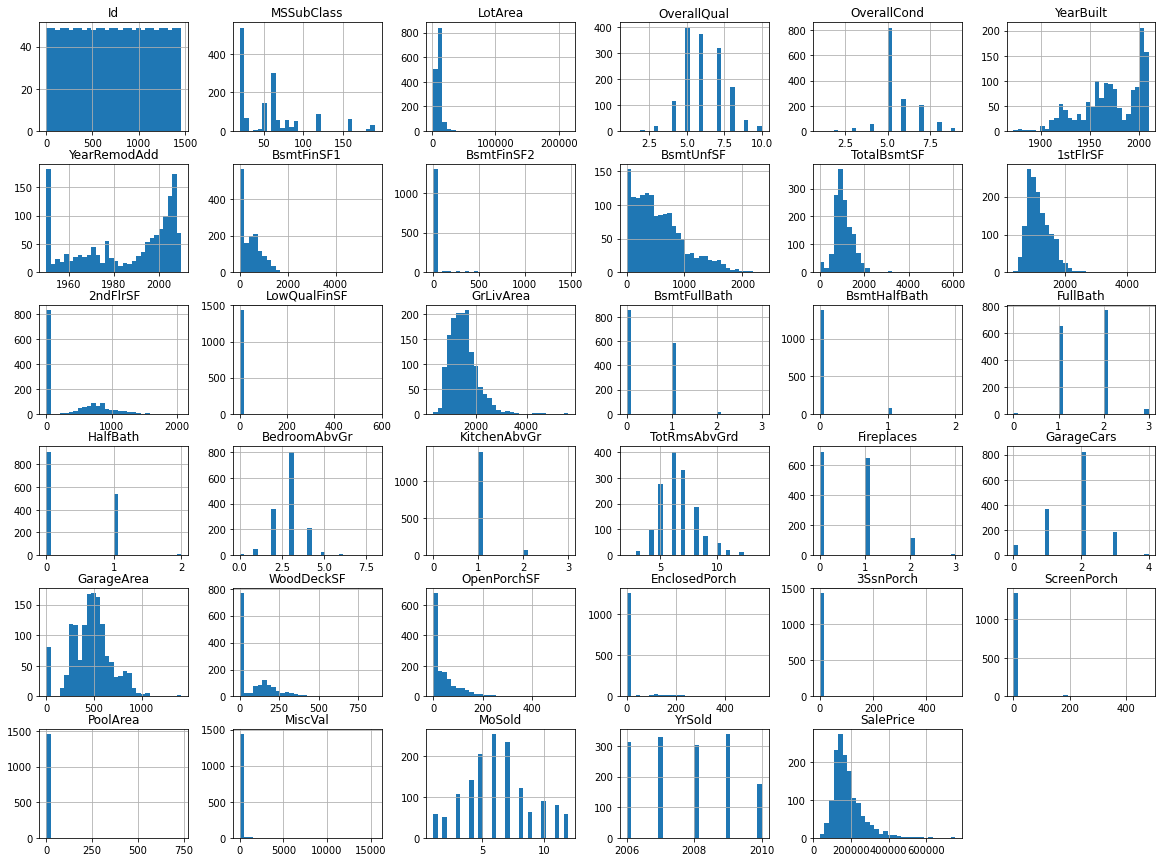

In [20]:
# Plotagem de histogramas 
# Histogramas expressam a distribuição de frequência para variáveis numéricas

_ = df_train.hist(bins=30,figsize=(20,15))

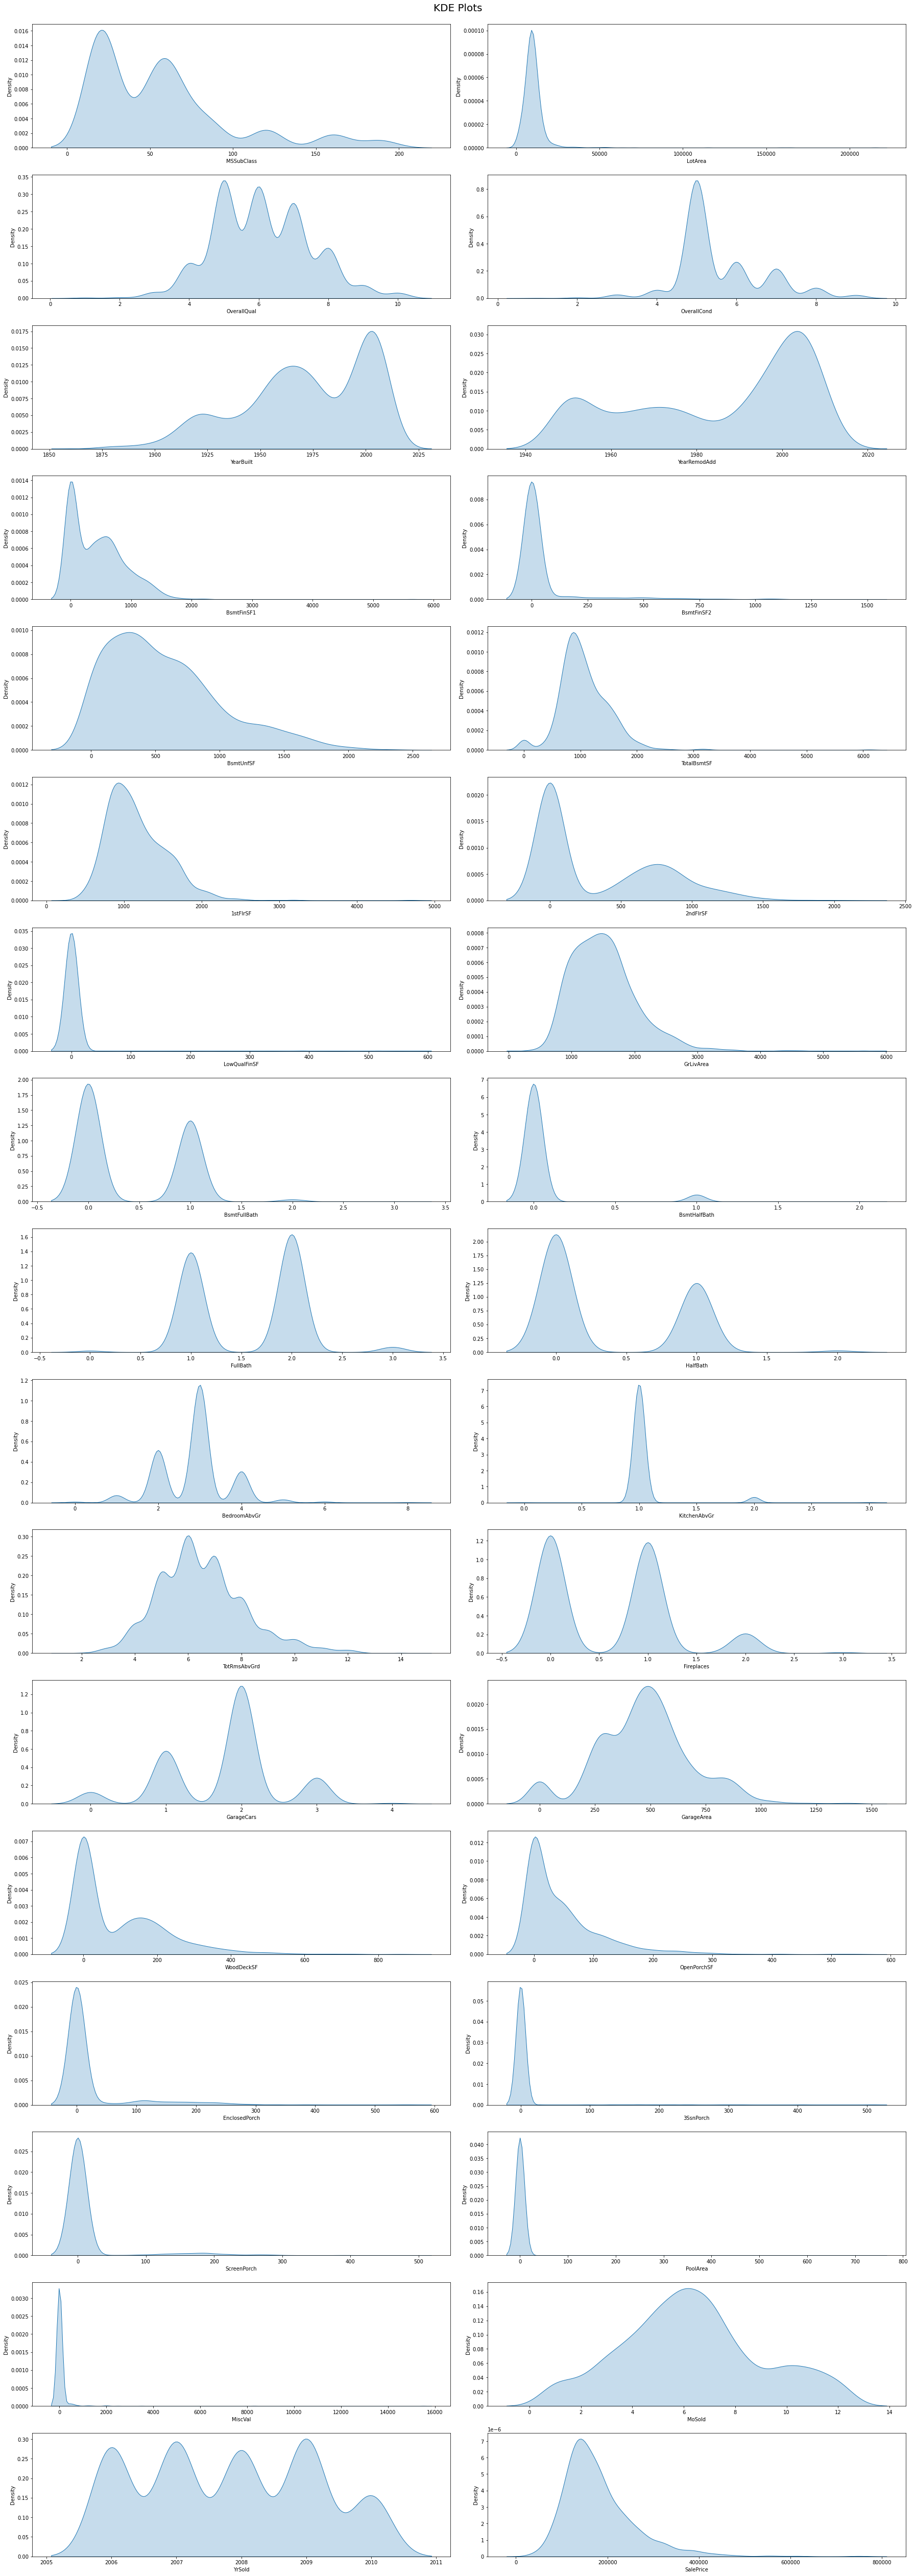

In [21]:
# Função que auxilia na plotagem dos gráficos KDE
def plot_kde(df):
    # Retirar a variável Id de num_attributes
    numerical_columns = num_attributes.columns.drop('Id')
    fig, ax = plt.subplots(int(len(numerical_columns)/2),2, 
                           figsize=(25,70))
    colunas = numerical_columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.kdeplot(data=df[colunas[indice]], ax=ax[j][i],shade=True)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return
# KDE plot 
plot_kde(df_train)

**Insights**: 

**Notamos que a maioria dos imóveis:**
* Foram construídos nos últimos anos;
* Possuem até 1000 pés quadrados inacabados referentes à área do porão;
* Possuem até 2000 de total de pés quadrados de área do porão;
* Possuem até 2000 de pés quadrados do primeiro andar;
* Possuem até 2000 de pés quadrados de área acima do nível do solo;
* Possuem 500 pés quadrados de área de garagem;
* Possuem preço de venda até 200000;
* Foram vendidos no meio do ano;
* Possuem 3 quartos acima do nível do solo;
* Possuem 6 cômodos acima do nível do solo;
* Possuem acabamento, qualidade do material e condição do imóvel classificados como razoável ou acima da média.


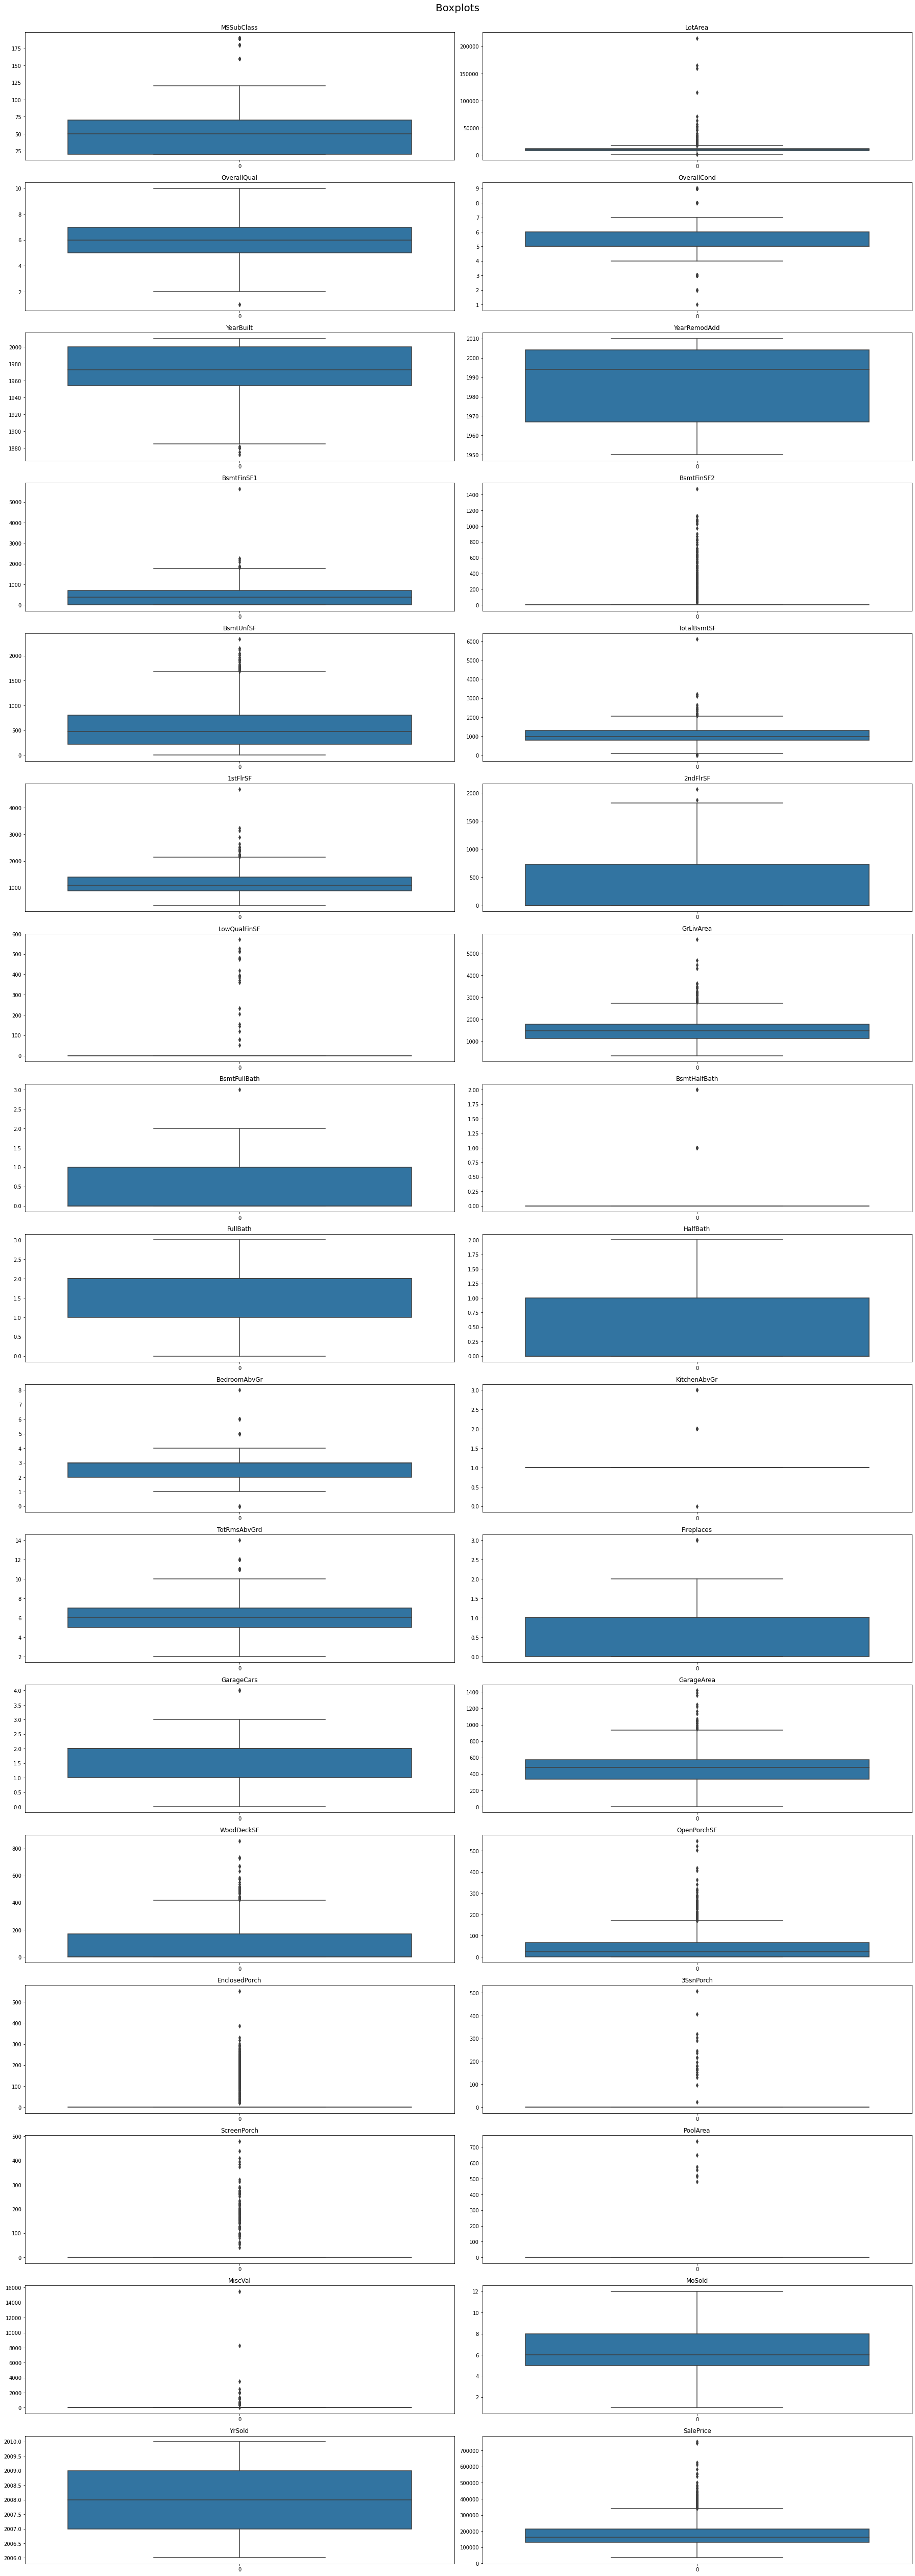

In [22]:
# Afim de visualizar a distribuição dos dados para cada variável e identificar possíveis outliers utilizaremos a seguinte função que auxilia na plotagem dos 
# gráficos boxplot
def plot_boxplot(df):
    # Retirar a variável Id de num_attributes
    numerical_columns = num_attributes.columns.drop('Id')
    fig, ax = plt.subplots(int(len(numerical_columns)/2),2, 
                           figsize=(25,70))
    colunas = numerical_columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i].set_title(colunas[indice])
            ax[j][i] = sns.boxplot(data=df[colunas[indice]], ax=ax[j][i])
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return
# KDE plot 
plot_boxplot(df_train)

### Análise Bivariada

O comando .pairplot gera distribuições univariadas na diagonal e distribuições bivariadas fora das diagonais

A importância desse tipo de gráfico é observar o comportamento das variáveis através de histogramas na diagonal e scatterplots fora da diagonal. Esses scatterplots representam a relação entre os pares de features.

In [23]:
numerical_columns = numeric_data.columns.drop('Id')
# Separando as variáveis numéricas em grupos
pair_columns1 = numerical_columns[:8]
pair_columns2 = numerical_columns[8:16]
pair_columns3 = numerical_columns[16:25]
pair_columns4 = numerical_columns[26::]

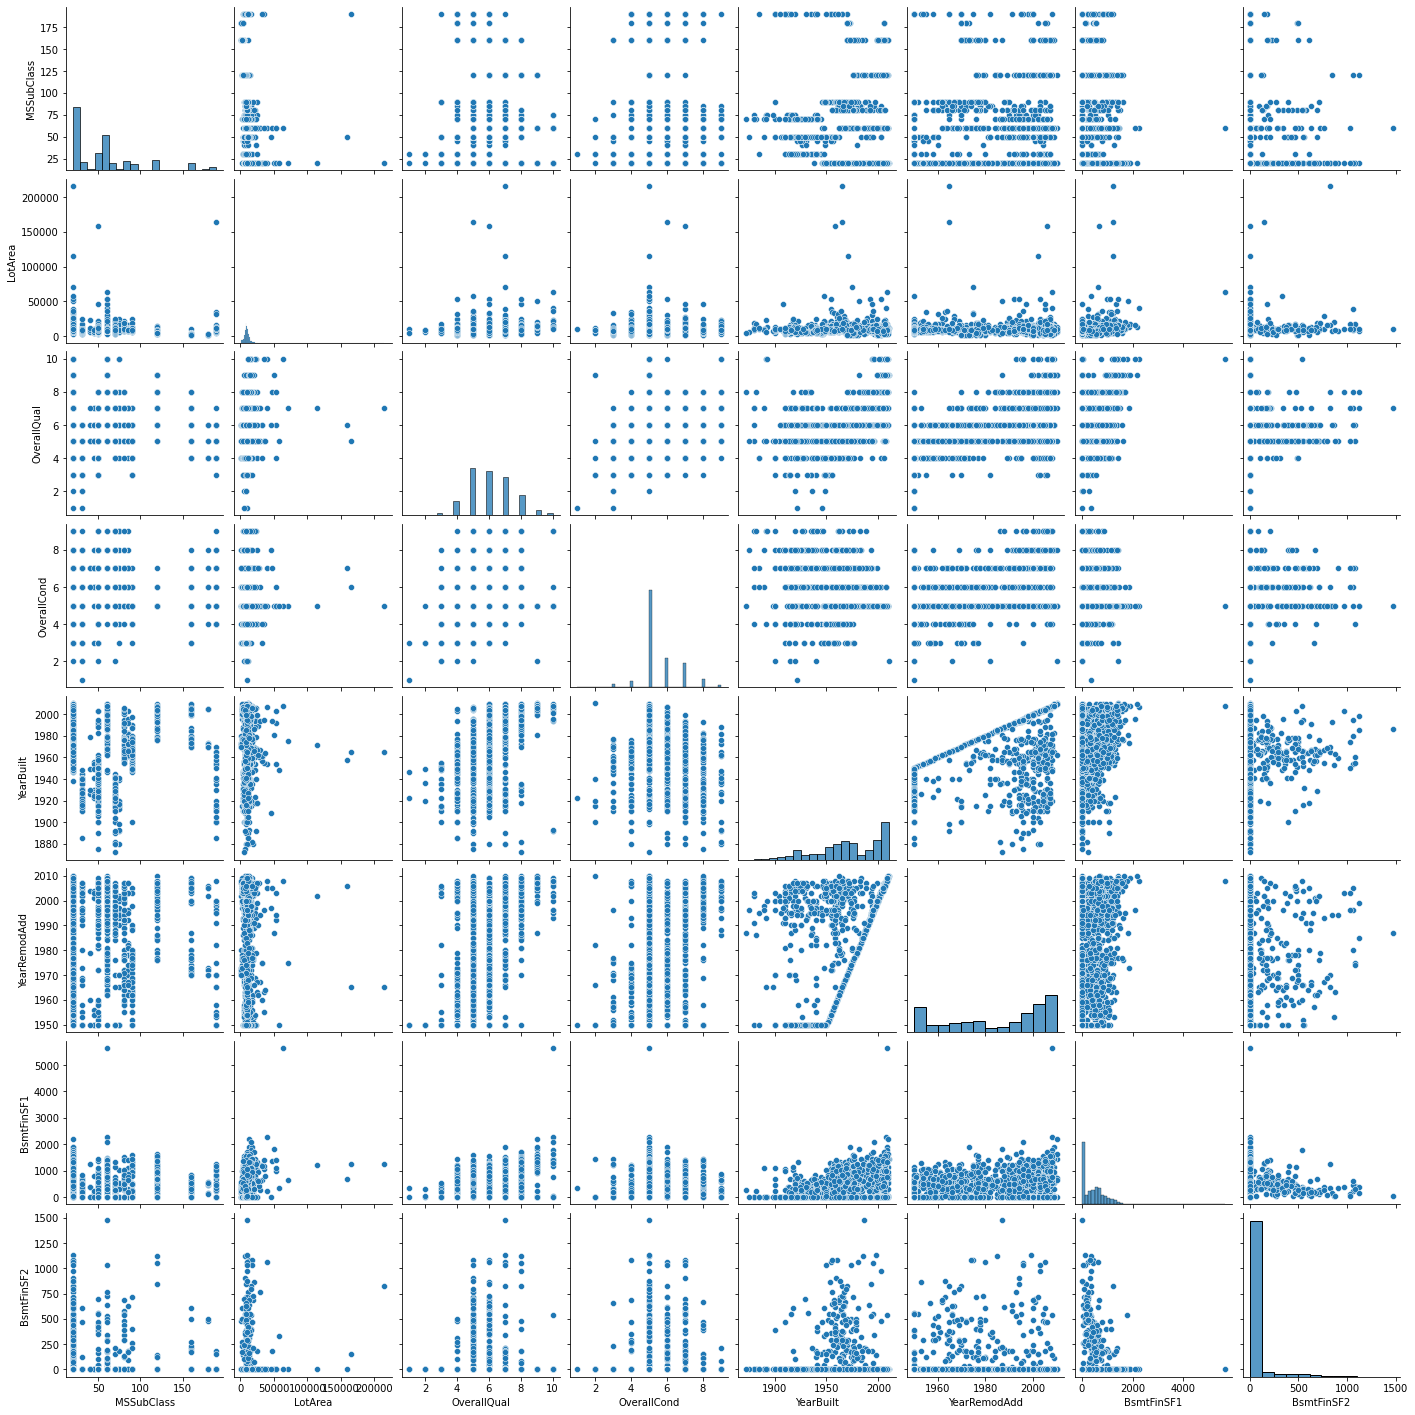

In [24]:
# Plot 1
sns.pairplot(df_train[pair_columns1])
plt.show()

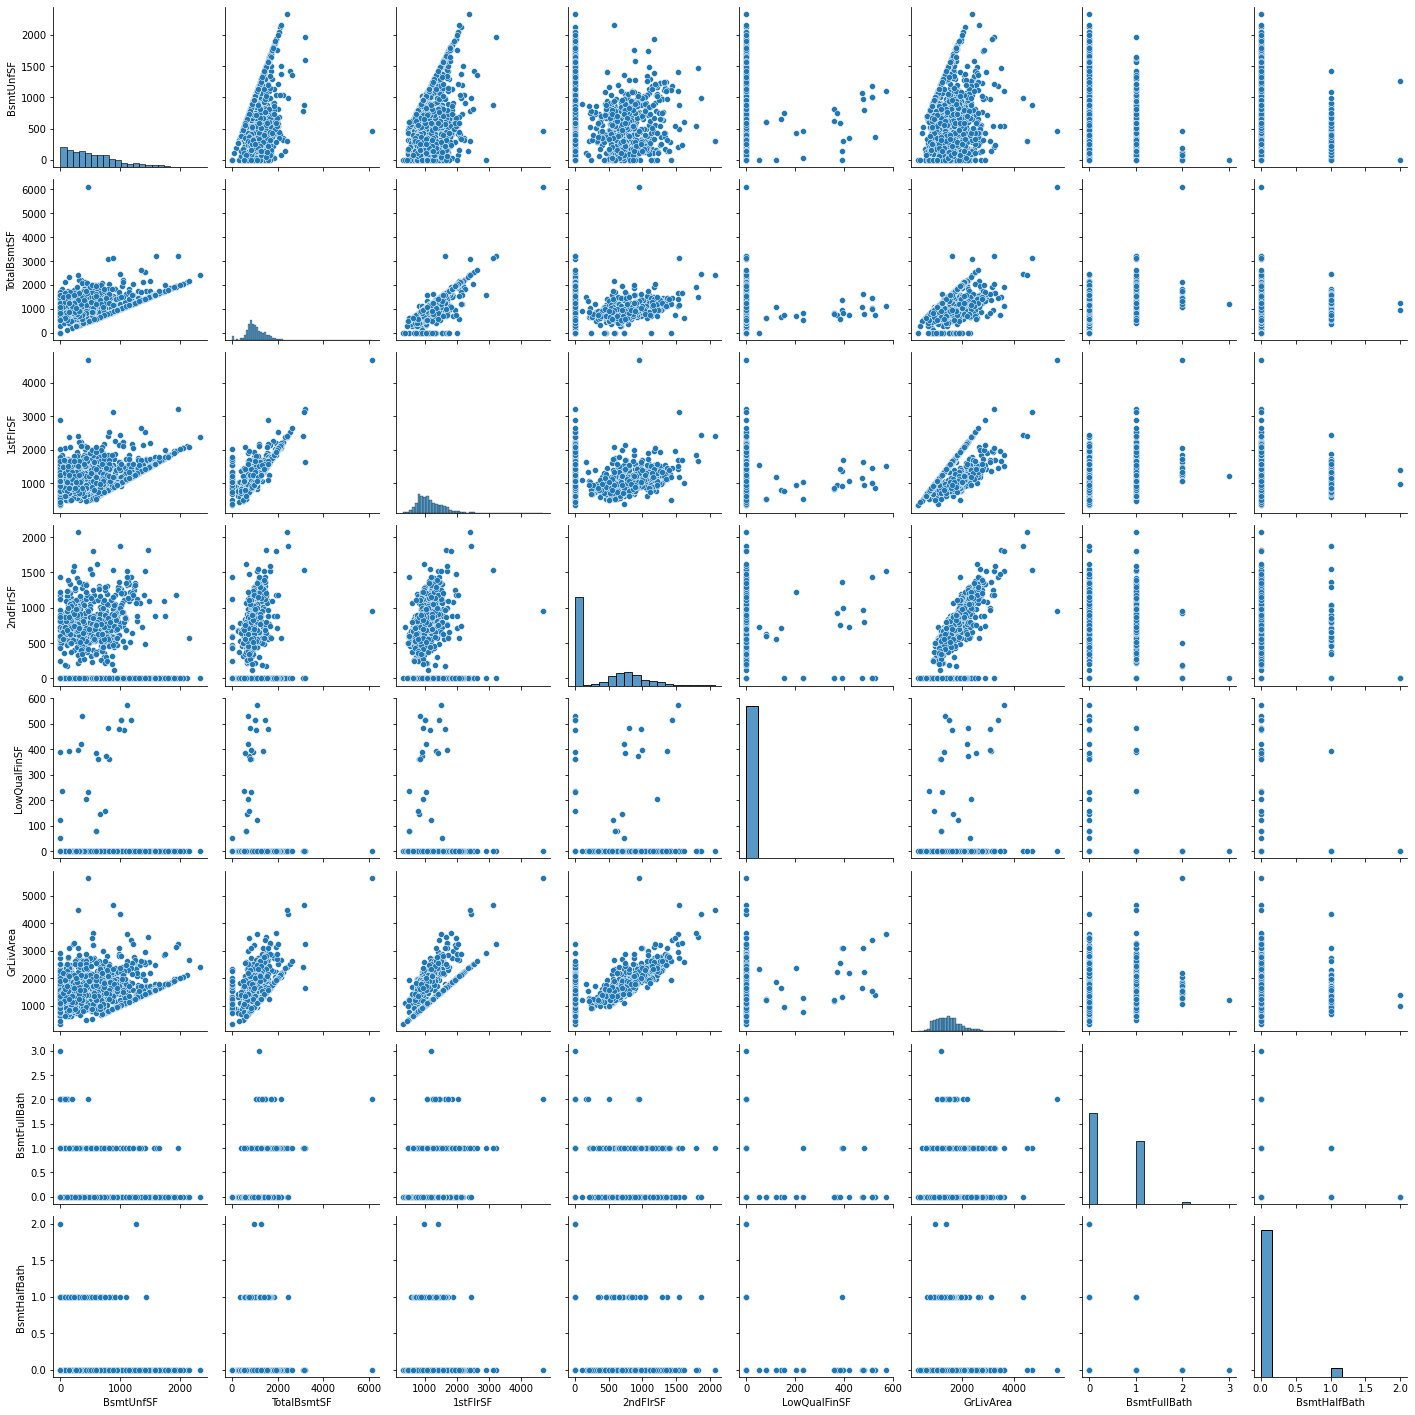

In [25]:
# Plot 2
sns.pairplot(df_train[pair_columns2])
plt.show()

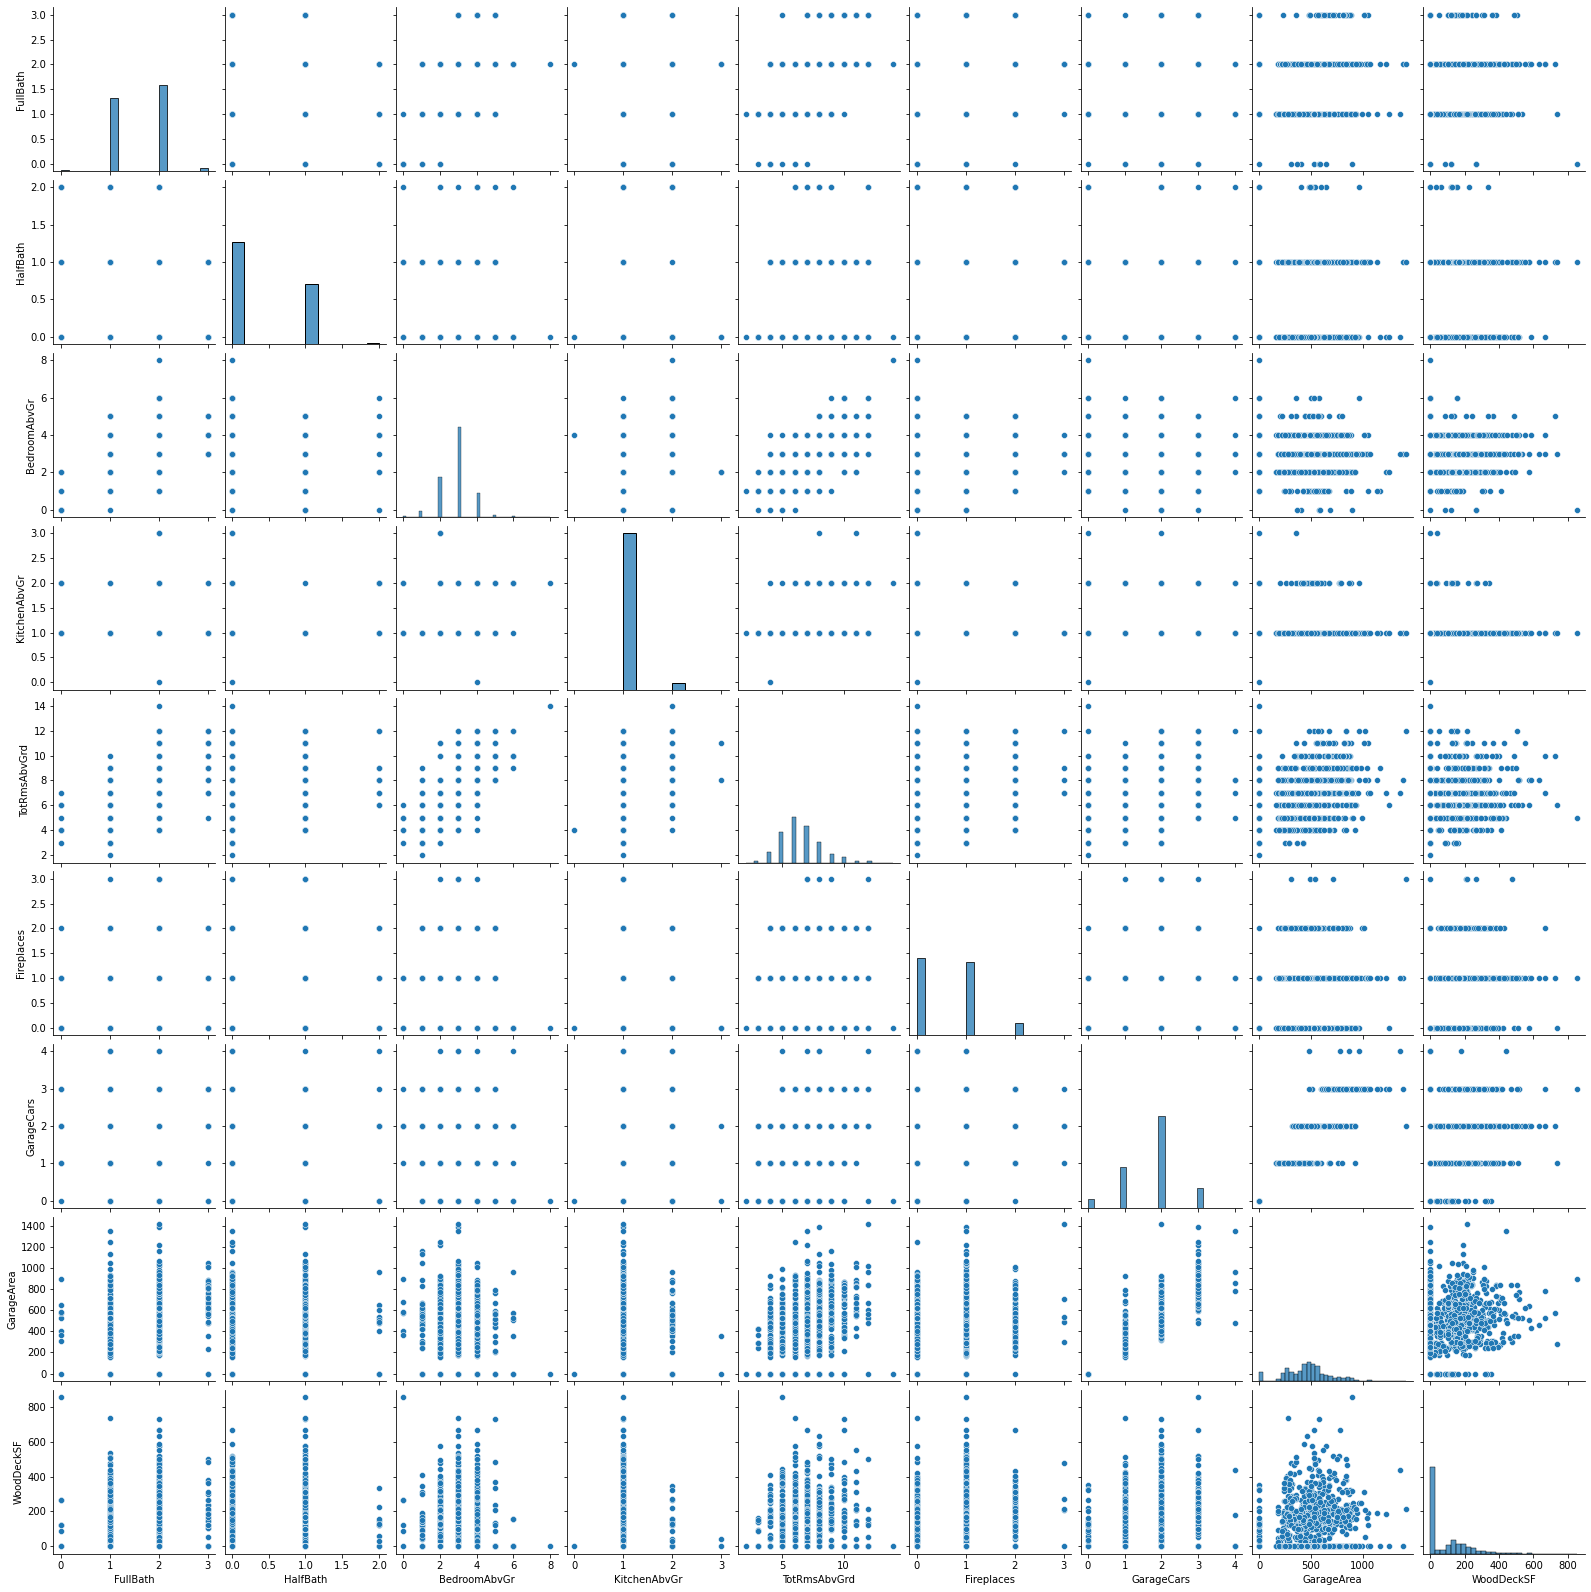

In [26]:
# Plot 3
sns.pairplot(df_train[pair_columns3])
plt.show()

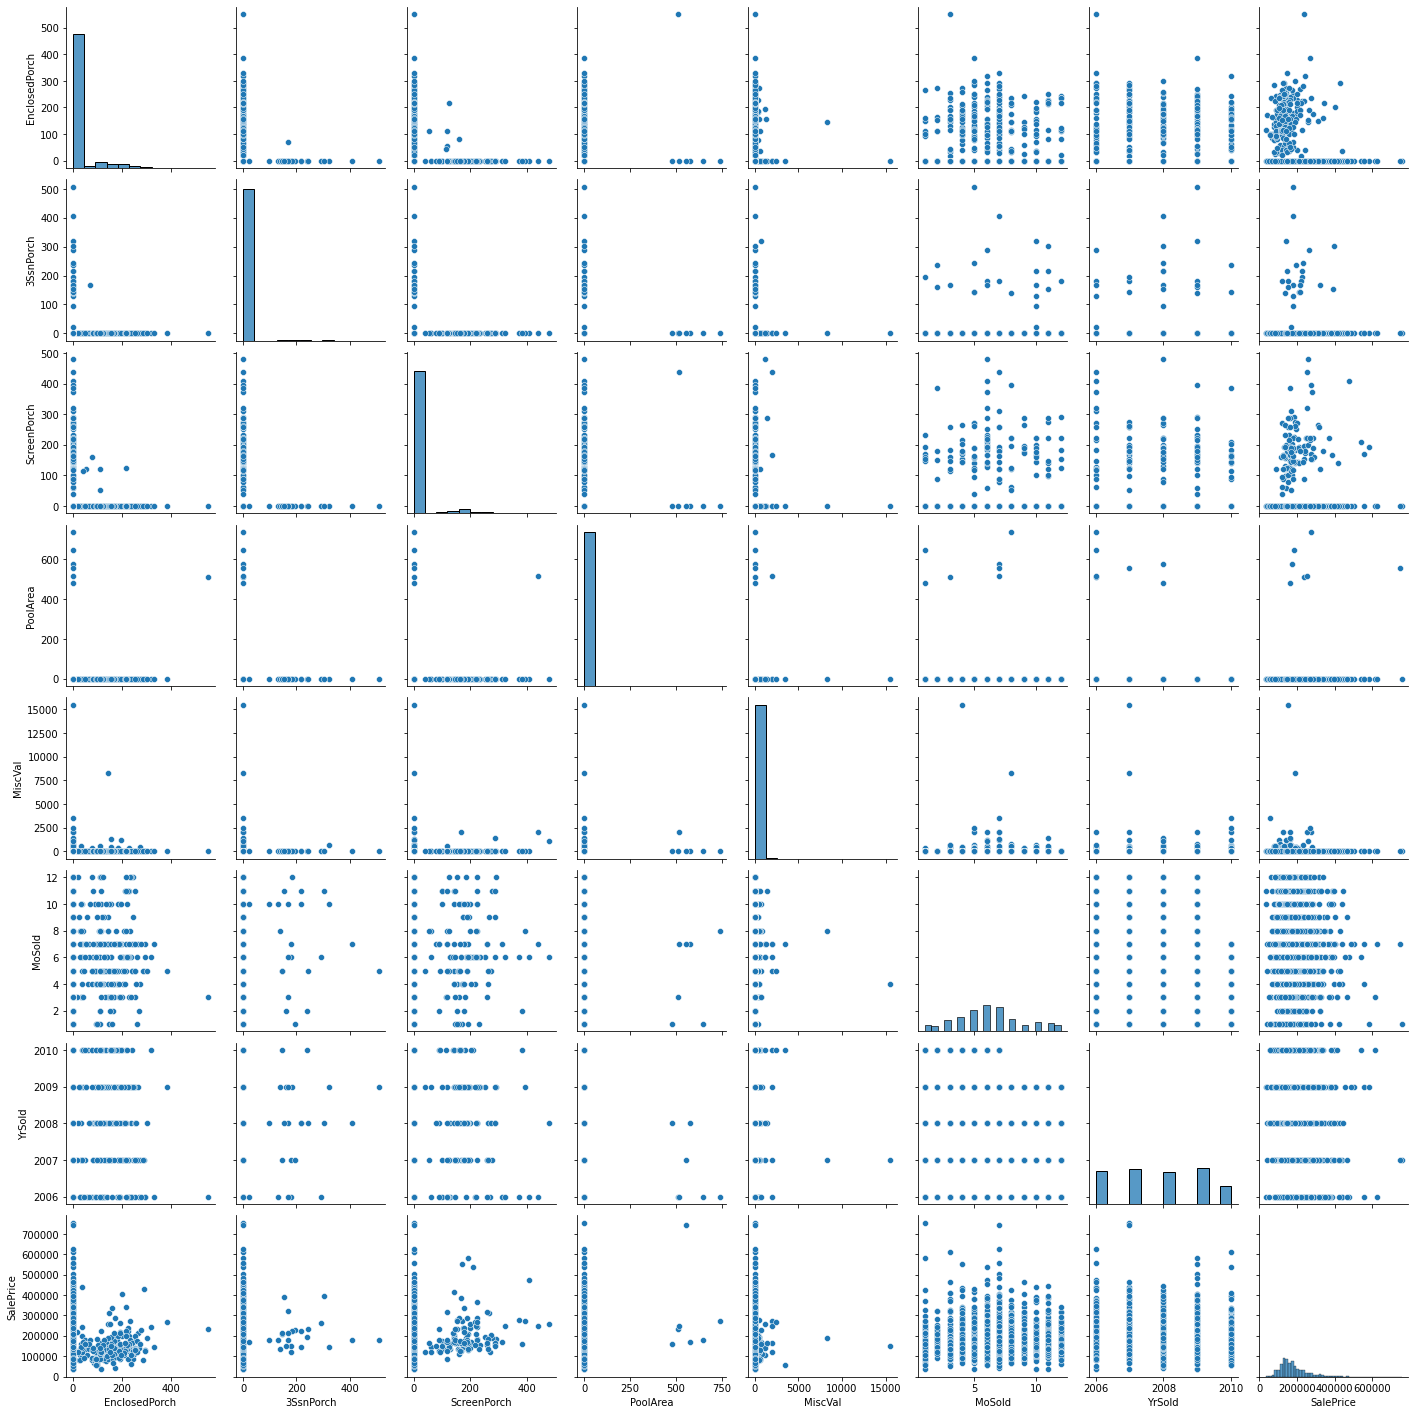

In [27]:
# Plot 4
sns.pairplot(df_train[pair_columns4])
plt.show()

In [28]:
# Aplicando coeficiente de correlação de Pearson
df_train_corr = df_train.drop('Id',axis=1).corr()
df_train_corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


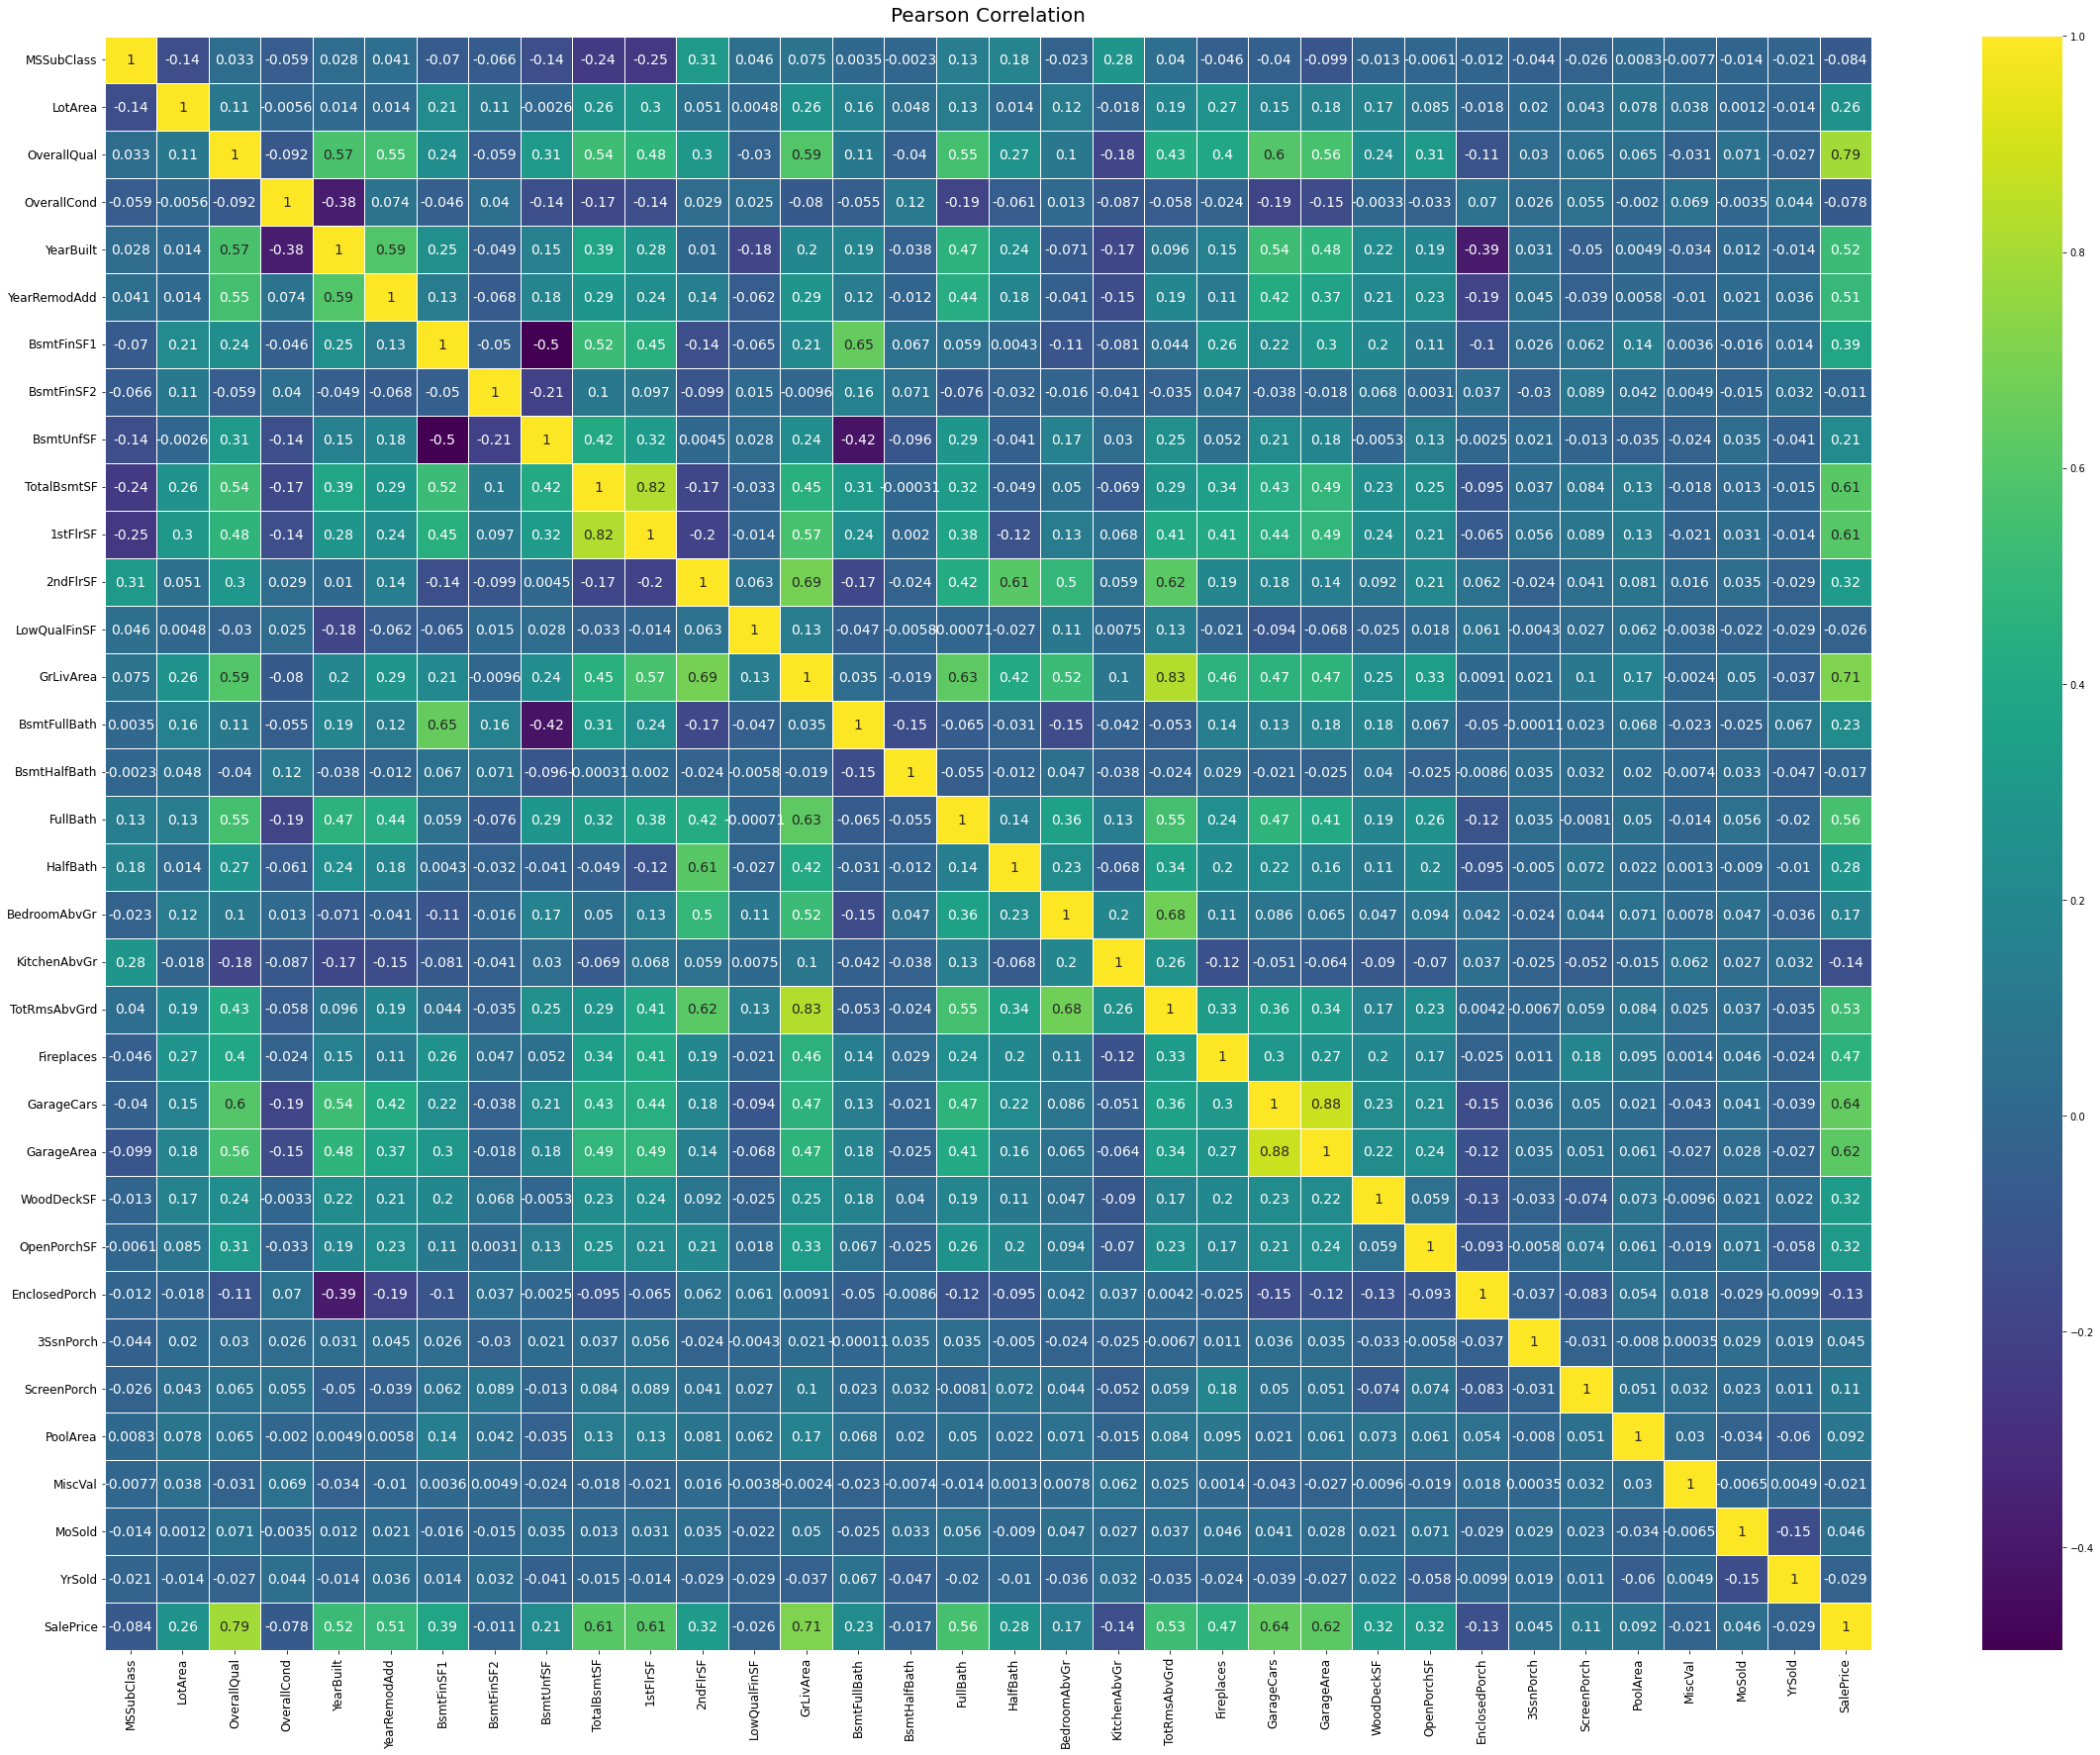

In [29]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (40,30))
res = sns.heatmap(df_train_corr, vmax = 1, linewidths = 0.7, cmap = 'viridis',annot_kws={"size": 14},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)

O coeficiente de correlação de Pearson nos auxiliar a identificar a intensidade e a direção da relação linear entre duas variáveis. Este coeficiente pode assumir valores entre -1 e 1, o valor em módulo indica a intensidade da relação linear entre as duas variáveis, enquanto o sinal indica a direção. Dessa forma, o sinal positivo indica correlação direta e o sinal negativo indica correlação inversa.

### Remoção de outliers

Visando desenvolver o modelo de machine learning, optei pela remoção de dados outliers uma vez que a presença destes dados provoca a alteração na curva de regressão linear, consequentemente, afetando negativamente as predições dadas por este modelo. Dessa forma, através da remoção destes dados conseguimos aumentar a acurácia do modelo.

In [30]:
# Cálculo do primeiro quartil (Q1)
Q1 = np.percentile(df_train['SalePrice'], 25,
                   interpolation = 'midpoint')

# Cálculo do terceiro quartil (Q3) 
Q3 = np.percentile(df_train['SalePrice'], 75,
                   interpolation = 'midpoint')

# Cálculo do IQR (Intervalo Interquartil)
IQR = Q3 - Q1

# Cálculo do limite superior
upper = Q3 +1.5*IQR

# Cálculo do limite inferior
lower = Q1 - 1.5*IQR
 
# Removendo outliers
df_train = df_train[df_train.SalePrice <= upper]
df_train = df_train[df_train.SalePrice >= lower]

df_train_sem_outliers = df_train.copy()

In [31]:
# Definindo as variáveis numéricas e categóricas
numeric_data = df_train.select_dtypes(include=['int64','float64'])
cat_data     = df_train.select_dtypes(include='object')

In [32]:
# Realizando split dos dados
df_train_target_encoding = df_train_sem_outliers.copy()
X = df_train_target_encoding.drop('SalePrice',axis=1)
y = df_train_target_encoding.SalePrice
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30,random_state=0)

In [33]:
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

In [34]:
encoder = TargetEncoder(cols=cat_data.columns)
Xtrain = encoder.fit_transform(df_target_encoding_train.drop('SalePrice',axis=1),df_target_encoding_train.SalePrice);
Xtest  = encoder.transform(df_target_encoding_test.drop('SalePrice',axis=1),df_target_encoding_test.SalePrice);
ytrain = df_target_encoding_train.SalePrice
ytest = df_target_encoding_test.SalePrice

### Regressão Linear

In [35]:
print('Regressão Linear \n-------------------------------------------------------------------------')
modelo = LinearRegression();
modelo.fit(Xtrain,ytrain);
p = modelo.predict(Xtest)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:',mean_absolute_error(ytest,p))
print('MSE:',mean_squared_error(ytest,p))
print('RMSE:',np.sqrt(mean_squared_error(ytest,p)))
print('MAE representa {}% do valor da média'.format(round(100*mean_absolute_error(ytest,p)/df_target_encoding_test.SalePrice.mean(),2)))

Regressão Linear 
-------------------------------------------------------------------------
MAE: 17278.77784429546
MSE: 559145049.7723218
RMSE: 23646.248111958943
MAE representa 9.91% do valor da média


### Regressão Ridge

In [36]:
pipeline_ridge = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
])
search_ridge = GridSearchCV(pipeline_ridge,
                      {'model__alpha':np.arange(0.01,10,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )

In [37]:
search_ridge.fit(Xtrain,ytrain)
predridge = search_ridge.predict(Xtest)

In [38]:
print('Regressão Ridge \n-------------------------------------------------------------------------')
print('MAE:',mean_absolute_error(ytest,predridge))
print('MSE:',mean_squared_error(ytest, predridge))
print('RMSE:',np.sqrt(mean_squared_error(ytest,predridge)))
print('MAE representa {}% do valor da média'.format(round(100*mean_absolute_error(ytest,predridge)/df_target_encoding_test.SalePrice.mean(),2)))

Regressão Ridge 
-------------------------------------------------------------------------
MAE: 17167.980394133047
MSE: 554978896.9866756
RMSE: 23557.99008800784
MAE representa 9.85% do valor da média


### LASSO

In [39]:
pipeline_lasso = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search_lasso = GridSearchCV(pipeline_lasso,
                      {'model__alpha':np.arange(0.01,10,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )

In [40]:
search_lasso.fit(Xtrain,ytrain)
predlasso = search_lasso.predict(Xtest)

In [41]:
print('Regressão Lasso \n-------------------------------------------------------------------------')
print('MAE:',mean_absolute_error(ytest,predlasso))
print('MSE:',mean_squared_error(ytest, predlasso))
print('RMSE:',np.sqrt(mean_squared_error(ytest,predlasso)))
print('MAE representa {}% do valor da média'.format(round(100*mean_absolute_error(ytest,predlasso)/df_target_encoding_test.SalePrice.mean(),2)))

Regressão Lasso 
-------------------------------------------------------------------------
MAE: 17236.871402257828
MSE: 557050752.21865
RMSE: 23601.92263818035
MAE representa 9.89% do valor da média


### Considerações:

Para este dataset diante das condições que foram testadas tanto a Regressão Ridge quanto a Lasso foram melhores que a Regressão Linear, entretanto, a **Regressão Ridge apresentou um desempenho melhor**. Portanto, a Regressão Ridge será utilizada para o modelo de machine learning.

# Aplicação do modelo no conjunto de dados de teste

In [42]:
# Definindo as variáveis numéricas e categóricas
numeric_data_test = df_test.select_dtypes(include=['int64','float64'])
cat_data_test     = df_test.select_dtypes(include='object')

In [43]:
df_test_final = encoder.transform(df_test);
predridge_test = search_ridge.predict(df_test_final)

In [44]:
my_submission = pd.DataFrame({'Id': df_test_final.Id, 'SalePrice': predridge_test})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)